# Set up workspace

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import glob
import seaborn as sns
from scipy import stats
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('/glade/u/home/czarakas/coupled_PPE/code/utils/')

In [3]:
from load_ensembles import *

In [4]:
from cartopy.util import add_cyclic_point
import cartopy.crs as ccrs

In [5]:
from utils import *

In [6]:
from load_gridcell_areas import *

# Load ensemble

In [7]:
ensemble_offline_Ts=load_offline_ensemble(var='TSKIN', domain='lnd')
ensemble_offline_FSDS=load_offline_ensemble(var='FSDS', domain='lnd')
ensemble_offline_FSA=load_offline_ensemble(var='FSA', domain='lnd')
ensemble_offline_LH=load_offline_ensemble(var='EFLX_LH_TOT', domain='lnd')
ensemble_offline_SH=load_offline_ensemble(var='FSH', domain='lnd')
ensemble_offline_FIRA=load_offline_ensemble(var='FIRA', domain='lnd') #	net infrared (longwave) radiation
ensemble_offline_FIRE=load_offline_ensemble(var='FIRE', domain='lnd') #emitted infrared (longwave) radiation
ensemble_offline_LAISUN=load_offline_ensemble(var='LAISUN', domain='lnd')
ensemble_offline_LAISHA=load_offline_ensemble(var='LAISHA', domain='lnd')
ensemble_offline_GSSUNLN=load_offline_ensemble(var='GSSUNLN', domain='lnd')
ensemble_offline_GSSHALN=load_offline_ensemble(var='GSSHALN', domain='lnd')
ensemble_offline_HTOP=load_offline_ensemble(var='HTOP', domain='lnd')

In [8]:
basecase_lnd_offline_Ts=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/offline_simulations/OFFL0000_PI_v02/lnd/proc/tseries/OFFL0000_PI_v02.clm2.h0.timeseries.'+'TSKIN'+'.nc')
basecase_lnd_offline_FSDS=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/offline_simulations/OFFL0000_PI_v02/lnd/proc/tseries/OFFL0000_PI_v02.clm2.h0.timeseries.'+'FSDS'+'.nc')
basecase_lnd_offline_FSA=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/offline_simulations/OFFL0000_PI_v02/lnd/proc/tseries/OFFL0000_PI_v02.clm2.h0.timeseries.'+'FSA'+'.nc')
basecase_lnd_offline_LH=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/offline_simulations/OFFL0000_PI_v02/lnd/proc/tseries/OFFL0000_PI_v02.clm2.h0.timeseries.'+'EFLX_LH_TOT'+'.nc')
basecase_lnd_offline_SH=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/offline_simulations/OFFL0000_PI_v02/lnd/proc/tseries/OFFL0000_PI_v02.clm2.h0.timeseries.'+'FSH'+'.nc')
basecase_lnd_offline_FIRE=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/offline_simulations/OFFL0000_PI_v02/lnd/proc/tseries/OFFL0000_PI_v02.clm2.h0.timeseries.'+'FIRE'+'.nc')
basecase_lnd_offline_FIRA=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/offline_simulations/OFFL0000_PI_v02/lnd/proc/tseries/OFFL0000_PI_v02.clm2.h0.timeseries.'+'FIRA'+'.nc')
basecase_lnd_offline_LAISUN=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/offline_simulations/OFFL0000_PI_v02/lnd/proc/tseries/OFFL0000_PI_v02.clm2.h0.timeseries.'+'LAISUN'+'.nc')
basecase_lnd_offline_LAISHA=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/offline_simulations/OFFL0000_PI_v02/lnd/proc/tseries/OFFL0000_PI_v02.clm2.h0.timeseries.'+'LAISHA'+'.nc')
basecase_lnd_offline_GSSUNLN=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/offline_simulations/OFFL0000_PI_v02/lnd/proc/tseries/OFFL0000_PI_v02.clm2.h0.timeseries.'+'GSSUNLN'+'.nc')
basecase_lnd_offline_GSSHALN=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/offline_simulations/OFFL0000_PI_v02/lnd/proc/tseries/OFFL0000_PI_v02.clm2.h0.timeseries.'+'GSSHALN'+'.nc')
basecase_lnd_offline_HTOP=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/offline_simulations/OFFL0000_PI_v02/lnd/proc/tseries/OFFL0000_PI_v02.clm2.h0.timeseries.'+'HTOP'+'.nc')

# Calculate kernels

In [178]:
ds_a1=xr.open_mfdataset('/glade/work/czarakas/Lague_kernels/global_a1_cv2_hc0.1_rs100_offline_b07/'+
                   'means/global_a1_cv2_hc0.1_rs100_offline_b07.clm2.h0.20-50_year_avg.nc')
ds_a2=xr.open_mfdataset('/glade/work/czarakas/Lague_kernels/global_a2_cv2_hc0.1_rs100_offline_b07/'+
                   'means/global_a2_cv2_hc0.1_rs100_offline_b07.clm2.h0.20-50_year_avg.nc')
ds_rs200=xr.open_mfdataset('/glade/work/czarakas/Lague_kernels/global_a2_cv2_hc0.1_rs200_offline_b07/'+
                   'means/global_a2_cv2_hc0.1_rs200_offline_b07.clm2.h0.20-50_year_avg.nc')

In [179]:
delta_ts_rs=(ds_rs200.MML_ts-ds_a2.MML_ts).mean(dim='time')
delta_ts_a=(ds_a1.MML_ts-ds_a2.MML_ts).mean(dim='time')
delta_rs=(ds_rs200.MML_evap_rs-ds_a2.MML_evap_rs).mean(dim='time')
delta_a=(ds_a1.MML_alb-ds_a2.MML_alb).mean(dim='time')

In [180]:
deltaTs_deltaAlbedo=delta_ts_a/delta_a
deltaTs_deltaRs=delta_ts_rs/delta_rs

# Get time series for all points

In [284]:
i=27

In [285]:
print(crosswalk.description.values[i])

medlynintercept, max


<xarray.DataArray 'lon' ()>
array(300., dtype=float32)
Coordinates:
    lon      float32 300.0
Attributes:
    long_name:  coordinate longitude
    units:      degrees_east
<xarray.DataArray 'lat' ()>
array(-4.736842, dtype=float32)
Coordinates:
    lat      float32 -4.736842
Attributes:
    long_name:  coordinate latitude
    units:      degrees_north


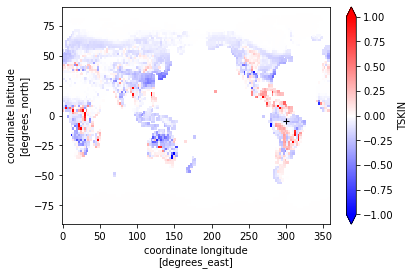

In [286]:
# Map of offline temperature change
delta_Ts_map=(ensemble_offline_Ts[i]['TSKIN'][12*60:,:,:]-
             basecase_lnd_offline_Ts['TSKIN'][12*60:,:,:]).mean(dim='time')
(delta_Ts_map).plot(vmin=-1, 
                vmax=1,
                cmap=plt.cm.bwr)

plt.plot(delta_Ts_map.lon[ilon],delta_Ts_map.lat[ilat],'+k')
print(delta_Ts_map.lon[ilon])
print(delta_Ts_map.lat[ilat])

In [287]:
ref_Ts=basecase_lnd_offline_Ts['TSKIN'][12*60:,:,:]#.groupby('time.month').mean(dim='time')
ref_FSDS=basecase_lnd_offline_FSDS['FSDS'][12*60:,:,:]#.groupby('time.month').mean(dim='time')
ref_FSA=basecase_lnd_offline_FSA['FSA'][12*60:,:,:]#.groupby('time.month').mean(dim='time')
ref_LH=basecase_lnd_offline_LH['EFLX_LH_TOT'][12*60:,:,:]#.groupby('time.month').mean(dim='time')
ref_SH=basecase_lnd_offline_SH['FSH'][12*60:,:,:]#.groupby('time.month').mean(dim='time')
ref_FIRA=basecase_lnd_offline_FIRA['FIRA'][12*60:,:,:]#.groupby('time.month').mean(dim='time')
ref_FIRE=basecase_lnd_offline_FIRE['FIRE'][12*60:,:,:]#.groupby('time.month').mean(dim='time')
ref_GSSUNLN=basecase_lnd_offline_GSSUNLN['GSSUNLN'][12*60:,:,:]#.groupby('time.month').mean(dim='time')
ref_GSSHALN=basecase_lnd_offline_GSSHALN['GSSHALN'][12*60:,:,:]#.groupby('time.month').mean(dim='time')
ref_LAISUN=basecase_lnd_offline_LAISUN['LAISUN'][12*60:,:,:]#.groupby('time.month').mean(dim='time')
ref_LAISHA=basecase_lnd_offline_LAISHA['LAISHA'][12*60:,:,:]#.groupby('time.month').mean(dim='time')
ref_HTOP=basecase_lnd_offline_HTOP['HTOP'][12*60:,:,:]#.groupby('time.month').mean(dim='time')


ref_albedo=(1-ref_FSA/ref_FSDS)
ref_EF=ref_LH/(ref_LH+ref_SH)
ref_FSDS=ref_FIRE-ref_FIRA
ref_Rnet=ref_FSA-ref_FIRA
ref_G=ref_Rnet-ref_LH-ref_SH

ref_LAITOT=ref_LAISUN+ref_LAISHA
ref_GS=(ref_GSSHALN*ref_LAISHA)+(ref_GSSUNLN*ref_LAISUN)
ref_RS=42.3e6/ref_GS
ref_RS=ref_RS.where(ref_RS<=1000,1000)

In [288]:
ds_Ts=ensemble_offline_Ts[i]['TSKIN'][12*60:,:,:]#.groupby('time.month').mean(dim='time')
ds_FSDS=ensemble_offline_FSDS[i]['FSDS'][12*60:,:,:]#.groupby('time.month').mean(dim='time')
ds_FSA=ensemble_offline_FSA[i]['FSA'][12*60:,:,:]#.groupby('time.month').mean(dim='time')
ds_LH=ensemble_offline_LH[i]['EFLX_LH_TOT'][12*60:,:,:]#.groupby('time.month').mean(dim='time')
ds_SH=ensemble_offline_SH[i]['FSH'][12*60:,:,:]#.groupby('time.month').mean(dim='time')
ds_FIRA=ensemble_offline_FIRA[i]['FIRA'][12*60:,:,:]#.groupby('time.month').mean(dim='time')
ds_FIRE=ensemble_offline_FIRE[i]['FIRE'][12*60:,:,:]#.groupby('time.month').mean(dim='time')
ds_GSSUNLN=ensemble_offline_GSSUNLN[i]['GSSUNLN'][12*60:,:,:]#.groupby('time.month').mean(dim='time')
ds_GSSHALN=ensemble_offline_GSSHALN[i]['GSSHALN'][12*60:,:,:]#.groupby('time.month').mean(dim='time')
ds_LAISUN=ensemble_offline_LAISUN[i]['LAISUN'][12*60:,:,:]#.groupby('time.month').mean(dim='time')
ds_LAISHA=ensemble_offline_LAISHA[i]['LAISHA'][12*60:,:,:]#.groupby('time.month').mean(dim='time')
ds_HTOP=ensemble_offline_HTOP[i]['HTOP'][12*60:,:,:]#.groupby('time.month').mean(dim='time')

ds_EF=ds_LH/(ds_LH+ds_SH)
ds_albedo=(1-ds_FSA/ds_FSDS)
ds_FSDS=ds_FIRE-ds_FIRA
ds_Rnet=ds_FSA-ds_FIRA
ds_G=ds_Rnet-ds_LH-ds_SH

ds_LAITOT=ds_LAISUN+ds_LAISHA
ds_GS=(ds_GSSHALN*ds_LAISHA)+(ds_GSSUNLN*ds_LAISUN)
ds_RS=42.3e6/ds_GS
ds_RS=ds_RS.where(ds_RS<=1000,1000)

In [289]:
delta_Ts=ds_Ts-ref_Ts
delta_FSA=ds_FSA-ref_FSA
delta_albedo=ds_albedo-ref_albedo
delta_LH=ds_LH-ref_LH
delta_SH=ds_SH-ref_SH
delta_EF=ds_EF-ref_EF
delta_LHplusSH=(ds_LH-ref_LH)+(ds_SH-ref_SH)
delta_Rnet=ds_Rnet-ref_Rnet
delta_G=ds_G-ref_G
delta_LHandSH=ds_LH+ds_SH-ref_LH-ref_SH
delta_RS=ds_RS-ref_RS
delta_HTOP=ds_HTOP-ref_HTOP

# Apply kernels

In [290]:
deltaTs_fromAlbedo=(deltaTs_deltaAlbedo*delta_albedo).mean(dim='time').load()
deltaTs_fromRs=(deltaTs_deltaRs*delta_RS).mean(dim='time').load()
deltaTs_fromHTOP_ROUGH=(delta_HTOP*(0/-0.5)).mean(dim='time').load()
estimate=deltaTs_fromAlbedo+deltaTs_fromRs+deltaTs_fromHTOP_ROUGH
error=estimate-delta_Ts.mean(dim='time')

In [291]:
delta_Ts_map=(delta_Ts.mean(dim='time').load())
#error_map=error.mean(dim='time').load()
#estimate_map=estimate.mean(dim='time').load()

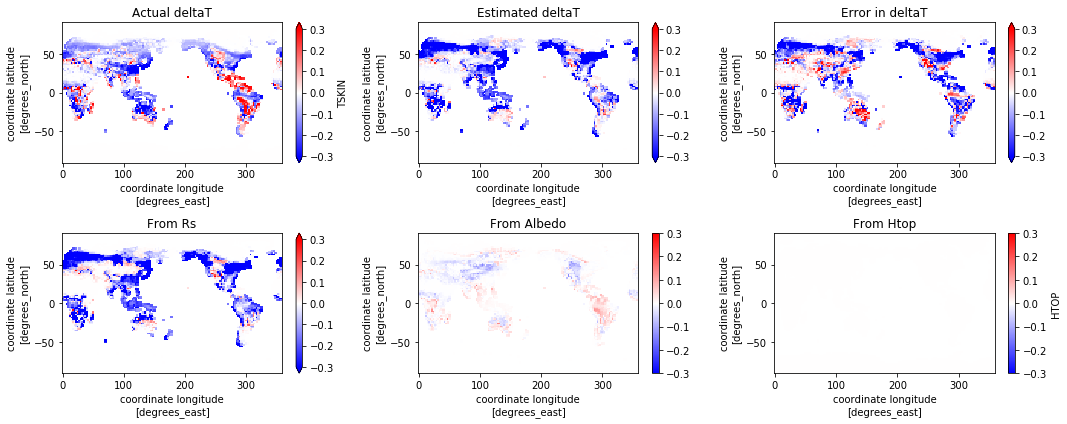

In [292]:
vmin=-0.3
vmax=0.3
plt.figure(figsize=(15,6))
plt.subplot(2,3,1)
delta_Ts_map.plot(vmin=vmin, 
                                  vmax=vmax, 
                                  cmap=plt.cm.bwr)
plt.title('Actual deltaT')
plt.subplot(2,3,2)
estimate.plot(vmin=vmin, 
                                  vmax=vmax, 
                                  cmap=plt.cm.bwr)
plt.title('Estimated deltaT')
plt.subplot(2,3,3)
(error).plot(vmin=vmin, 
                                  vmax=vmax, 
                                  cmap=plt.cm.bwr)
plt.title('Error in deltaT')
plt.subplot(2,3,4)
(deltaTs_fromRs).plot(vmin=vmin, 
                                                  vmax=vmax, 
                                                  cmap=plt.cm.bwr)
plt.title('From Rs')

plt.subplot(2,3,5)
(deltaTs_fromAlbedo).plot(vmin=vmin, 
                                                  vmax=vmax, 
                                                  cmap=plt.cm.bwr)
plt.title('From Albedo')

plt.subplot(2,3,6)
(deltaTs_fromHTOP_ROUGH).plot(vmin=vmin, 
                                                  vmax=vmax, 
                                                  cmap=plt.cm.bwr)
plt.title('From Htop')

plt.tight_layout()

In [293]:
print('Change in Ts')
print((delta_Ts_map*landweights).mean(dim=['lat','lon']).values)

print('Calculated estimate')
print((estimate_map*landweights).mean(dim=['lat','lon']).values)

print('From Albedo')
print((deltaTs_fromAlbedo*landweights).mean(dim=['lat','lon']).values)

print('From Rs')
print((deltaTs_fromRs*landweights).mean(dim=['lat','lon']).values)

print('Error')
print((error_map*landweights).mean(dim=['lat','lon']).values)

Change in Ts
-0.044471636
Calculated estimate
0.050656874
From Albedo
-0.0022029362
From Rs
-0.18651731
Error
-0.007867884


# Single point

In [ ]:
ilat=45
ilon=120

In [174]:
iref_Ts=basecase_lnd_offline_Ts['TSKIN'][12*60:,ilat,ilon]
iref_FSDS=basecase_lnd_offline_FSDS['FSDS'][12*60:,ilat,ilon]
iref_FSA=basecase_lnd_offline_FSA['FSA'][12*60:,ilat,ilon]
iref_LH=basecase_lnd_offline_LH['EFLX_LH_TOT'][12*60:,ilat,ilon]
iref_SH=basecase_lnd_offline_SH['FSH'][12*60:,ilat,ilon]
iref_FIRA=basecase_lnd_offline_FIRA['FIRA'][12*60:,ilat,ilon]
iref_FIRE=basecase_lnd_offline_FIRE['FIRE'][12*60:,ilat,ilon]
iref_GSSUNLN=basecase_lnd_offline_GSSUNLN['GSSUNLN'][12*60:,ilat,ilon]
iref_GSSHALN=basecase_lnd_offline_GSSHALN['GSSHALN'][12*60:,ilat,ilon]
iref_LAISUN=basecase_lnd_offline_LAISUN['LAISUN'][12*60:,ilat,ilon]
iref_LAISHA=basecase_lnd_offline_LAISHA['LAISHA'][12*60:,ilat,ilon]
iref_HTOP=basecase_lnd_offline_HTOP['HTOP'][12*60:,ilat,ilon]


iref_albedo=(1-iref_FSA/iref_FSDS)
iref_EF=iref_LH/(iref_LH+iref_SH)
iref_FSDS=iref_FIRE-iref_FIRA
iref_Rnet=iref_FSA-iref_FIRA
iref_G=iref_Rnet-iref_LH-iref_SH

iref_LAITOT=iref_LAISUN+iref_LAISHA
iref_GS=(iref_GSSHALN*iref_LAISHA)+(iref_GSSUNLN*iref_LAISUN)
iref_RS=42.3e6/iref_GS

In [175]:
ids_Ts=ensemble_offline_Ts[i]['TSKIN'][12*60:,ilat,ilon]
ids_FSDS=ensemble_offline_FSDS[i]['FSDS'][12*60:,ilat,ilon]
ids_FSA=ensemble_offline_FSA[i]['FSA'][12*60:,ilat,ilon]
ids_LH=ensemble_offline_LH[i]['EFLX_LH_TOT'][12*60:,ilat,ilon]
ids_SH=ensemble_offline_SH[i]['FSH'][12*60:,ilat,ilon]
ids_FIRA=ensemble_offline_FIRA[i]['FIRA'][12*60:,ilat,ilon]
ids_FIRE=ensemble_offline_FIRE[i]['FIRE'][12*60:,ilat,ilon]
ids_GSSUNLN=ensemble_offline_GSSUNLN[i]['GSSUNLN'][12*60:,ilat,ilon]
ids_GSSHALN=ensemble_offline_GSSHALN[i]['GSSHALN'][12*60:,ilat,ilon]
ids_LAISUN=ensemble_offline_LAISUN[i]['LAISUN'][12*60:,ilat,ilon]
ids_LAISHA=ensemble_offline_LAISHA[i]['LAISHA'][12*60:,ilat,ilon]
ids_HTOP=ensemble_offline_HTOP[i]['HTOP'][12*60:,ilat,ilon]

ids_EF=ids_LH/(ids_LH+ids_SH)
ids_albedo=(1-ids_FSA/ids_FSDS)
ids_FSDS=ids_FIRE-ids_FIRA
ids_Rnet=ids_FSA-ids_FIRA
ids_G=ids_Rnet-ids_LH-ids_SH

ids_LAITOT=ids_LAISUN+ids_LAISHA
ids_GS=(ids_GSSHALN*ids_LAISHA)+(ids_GSSUNLN*ids_LAISUN)
ids_RS=42.3e6/ids_GS

In [176]:
idelta_Ts=ids_Ts-iref_Ts
idelta_FSA=ids_FSA-iref_FSA
idelta_albedo=ids_albedo-iref_albedo
idelta_LH=ids_LH-iref_LH
idelta_SH=ids_SH-iref_SH
idelta_EF=ids_EF-iref_EF
idelta_LHplusSH=(ids_LH-iref_LH)+(ids_SH-iref_SH)
idelta_Rnet=ids_Rnet-iref_Rnet
idelta_G=ids_G-iref_G
idelta_LHandSH=ids_LH+ids_SH-iref_LH-iref_SH
idelta_RS=ids_RS-iref_RS
idelta_HTOP=ids_HTOP-iref_HTOP

# Make plots comparing mechanisms

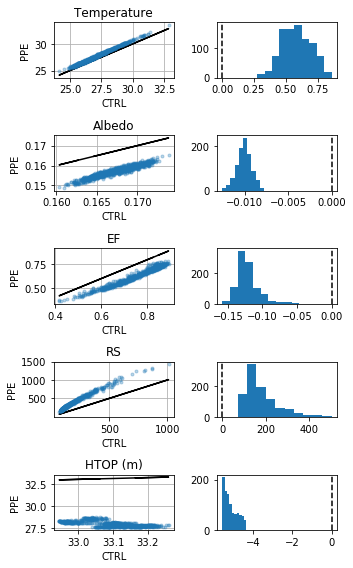

In [177]:
nrow=5
ncol=2
plt.figure(figsize=(5,8))

plt.subplot(nrow,ncol,1)
plt.plot(iref_Ts-273.15,iref_Ts-273.15,'-k')
plt.plot(iref_Ts-273.15,ids_Ts-273.15,'.',alpha=0.3)
plt.xlabel('CTRL')
plt.ylabel('PPE')
plt.title('Temperature')
plt.grid()
plt.subplot(nrow,ncol,2)
plt.hist(idelta_Ts)
plt.axvline(x=0,linestyle='--',color='k')

plt.subplot(nrow,ncol,3)
plt.plot(iref_albedo,iref_albedo,'-k')
plt.plot(iref_albedo,ids_albedo,'.',alpha=0.3)
plt.xlabel('CTRL')
plt.ylabel('PPE')
plt.title('Albedo')
plt.grid()
plt.subplot(nrow,ncol,4)
plt.hist(idelta_albedo)
plt.axvline(x=0,linestyle='--',color='k')

plt.subplot(nrow,ncol,5)
plt.xlabel('CTRL')
plt.ylabel('PPE')
plt.title('EF')
plt.plot(iref_EF,iref_EF,'-k')
plt.plot(iref_EF,ids_EF,'.',alpha=0.3)
#plt.xlabe
plt.grid()
plt.subplot(nrow,2,6)
plt.hist(idelta_EF)
plt.axvline(x=0,linestyle='--',color='k')

plt.subplot(nrow,ncol,7)
plt.xlabel('CTRL')
plt.ylabel('PPE')
plt.title('RS')
plt.plot(iref_RS,iref_RS,'-k')
plt.plot(iref_RS,ids_RS,'.',alpha=0.3)
#plt.xlabe
plt.grid()
plt.subplot(nrow,ncol,8)
plt.hist(idelta_RS)
plt.axvline(x=0,linestyle='--',color='k')

plt.subplot(nrow,ncol,9)
plt.xlabel('CTRL')
plt.ylabel('PPE')
plt.title('HTOP ('+ds_HTOP.units+')')
plt.plot(iref_HTOP,iref_HTOP,'-k')
plt.plot(iref_HTOP,ids_HTOP,'.',alpha=0.3)
#plt.xlabe
plt.grid()
plt.subplot(nrow,ncol,10)
plt.hist(idelta_HTOP)
plt.axvline(x=0,linestyle='--',color='k')

plt.tight_layout()

In [111]:
deltaTs_deltaAlbedo_1pt=0.568448/-0.1
deltaTs_deltaRs_1pt=0.358437/100

In [113]:
0.15/50

0.003

(0, 1)

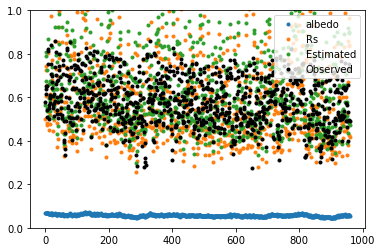

In [114]:
Ts_albedo=(deltaTs_deltaAlbedo_1pt)*delta_albedo
Ts_Rs=(deltaTs_deltaRs_1pt)*delta_RS
plt.plot(Ts_albedo, '.',label='albedo')
plt.plot(Ts_Rs, '.',label='Rs')
plt.plot(Ts_Rs+Ts_albedo, '.',label='Estimated')
plt.plot(delta_Ts,'.k',label='Observed')
plt.legend()
plt.ylim([0,1])

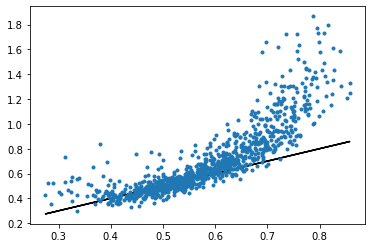

In [116]:
plt.plot(delta_Ts, delta_Ts,'-k')
plt.plot(delta_Ts, Ts_Rs+Ts_albedo,'.')

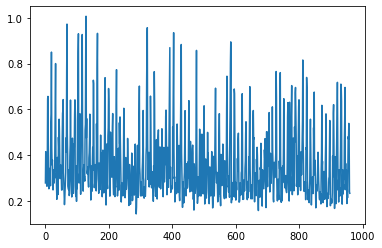

In [ ]:
It gets HOTTER
* Evaporative fraction DECREASES (-> warming)
* Albedo DECREASES (-> warming)
* Vegetation height DECREASES (-> warming)
* Evaporative resistance...?

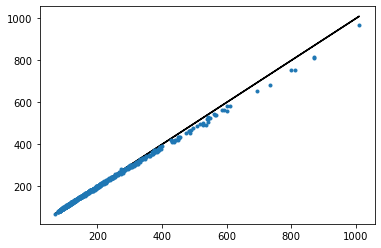

In [46]:
plt.plot(ref_RS,ref_RS,'-k')
plt.plot(ref_RS,ds_RS,'.')

-1.5119416


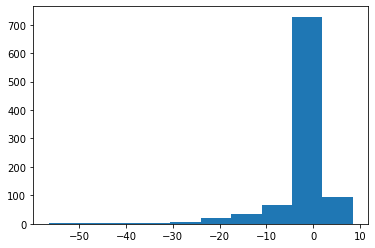

In [49]:
plt.hist(delta_RS)
print(np.nanmean(delta_RS))

# X

In [ ]:
Temperature increase
SWabs increase
LH decrease
SH increase

Text(0, 0.5, 'Change in Temperature')

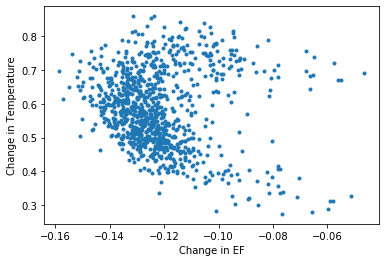

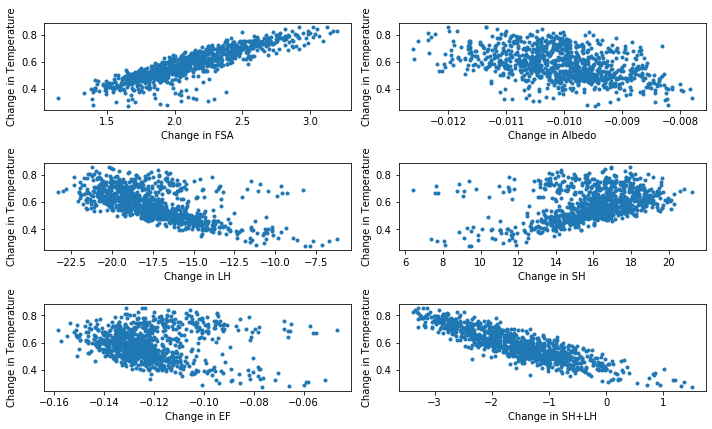

In [102]:
plt.figure(figsize=(10,6))
plt.subplot(3,2,1)
plt.plot(ds_FSA-ref_FSA, ds_Ts-ref_Ts,'.')
plt.xlabel('Change in FSA')
plt.ylabel('Change in Temperature')
plt.subplot(3,2,2)
plt.plot(ds_albedo-ref_albedo, ds_Ts-ref_Ts,'.')
plt.xlabel('Change in Albedo')
plt.ylabel('Change in Temperature')
plt.subplot(3,2,3)
plt.plot(ds_LH-ref_LH, ds_Ts-ref_Ts,'.')
plt.xlabel('Change in LH')
plt.ylabel('Change in Temperature')
plt.subplot(3,2,4)
plt.plot(ds_SH-ref_SH, ds_Ts-ref_Ts,'.')
plt.xlabel('Change in SH')
plt.ylabel('Change in Temperature')
plt.subplot(3,2,5)
plt.plot(ds_EF-ref_EF, ds_Ts-ref_Ts,'.')
plt.xlabel('Change in EF')
plt.ylabel('Change in Temperature')
plt.subplot(3,2,6)
plt.plot((ds_LH-ref_LH)+(ds_SH-ref_SH),ds_Ts-ref_Ts,'.')
plt.xlabel('Change in SH+LH')
plt.ylabel('Change in Temperature')
plt.tight_layout()

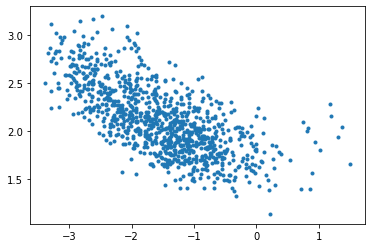

In [103]:
plt.plot((ds_LH-ref_LH)+(ds_SH-ref_SH),ds_FSA-ref_FSA,'.')

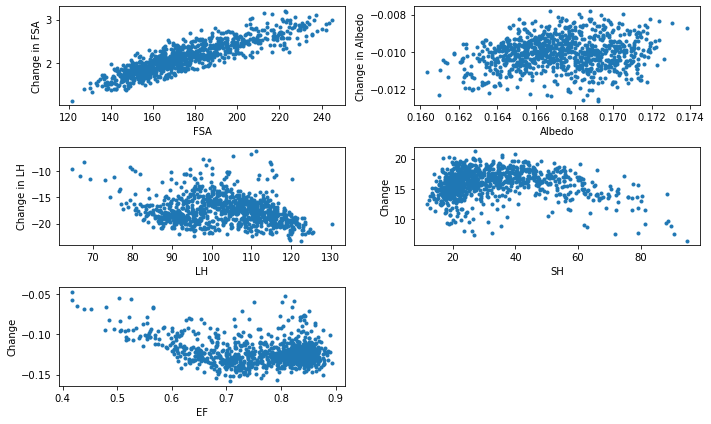

In [100]:
plt.figure(figsize=(10,6))
plt.subplot(3,2,1)
plt.plot(ref_FSA,ds_FSA-ref_FSA,'.')
plt.xlabel('FSA')
plt.ylabel('Change in FSA')
plt.subplot(3,2,2)
plt.plot(ref_albedo, ds_albedo-ref_albedo,'.')
plt.xlabel('Albedo')
plt.ylabel('Change in Albedo')
plt.subplot(3,2,3)
plt.plot(ref_LH, ds_LH-ref_LH, '.')
plt.xlabel('LH')
plt.ylabel('Change in LH')
plt.subplot(3,2,4)
plt.plot(ref_SH, ds_SH-ref_SH, '.')
plt.xlabel('SH')
plt.ylabel('Change')
plt.subplot(3,2,5)
plt.plot(ref_EF, ds_EF-ref_EF,'.')
plt.xlabel('EF')
plt.ylabel('Change')
plt.tight_layout()

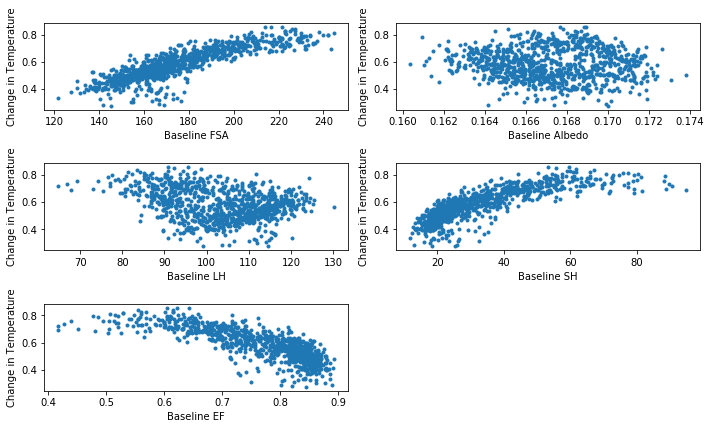

In [101]:
plt.figure(figsize=(10,6))
plt.subplot(3,2,1)
plt.plot(ref_FSA, ds_Ts-ref_Ts,'.')
plt.xlabel('Baseline FSA')
plt.ylabel('Change in Temperature')
plt.subplot(3,2,2)
plt.plot(ref_albedo, ds_Ts-ref_Ts,'.')
plt.xlabel('Baseline Albedo')
plt.ylabel('Change in Temperature')
plt.subplot(3,2,3)
plt.plot(ref_LH, ds_Ts-ref_Ts,'.')
plt.xlabel('Baseline LH')
plt.ylabel('Change in Temperature')
plt.subplot(3,2,4)
plt.plot(ref_SH, ds_Ts-ref_Ts,'.')
plt.xlabel('Baseline SH')
plt.ylabel('Change in Temperature')
plt.subplot(3,2,5)
plt.plot(ref_EF, ds_Ts-ref_Ts,'.')
plt.xlabel('Baseline EF')
plt.ylabel('Change in Temperature')
plt.tight_layout()

# X

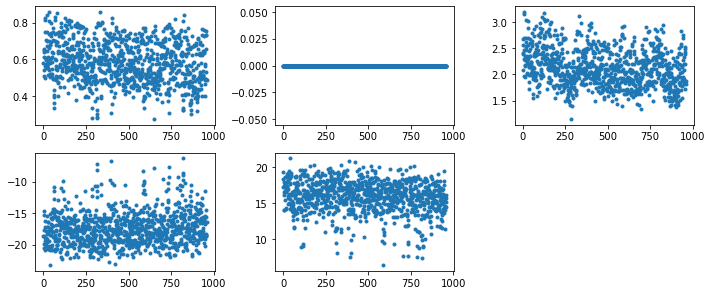

In [78]:
plt.figure(figsize=(10,6))
plt.subplot(3,3,1)
plt.plot(ds_Ts-ref_Ts,'.')
plt.subplot(3,3,2)
plt.plot(ds_FSDS-ref_FSDS,'.')
plt.subplot(3,3,3)
plt.plot(ds_FSA-ref_FSA,'.')
plt.subplot(3,3,4)
plt.plot(ds_LH-ref_LH,'.')
plt.subplot(3,3,5)
plt.plot(ds_SH-ref_SH,'.')

plt.tight_layout()

In [64]:
albedo=(1-ds_SWabs/ds_SWdown)[12*60:,ilat,ilon]

In [160]:
ref_Ts=basecase_lnd_offline_Ts['TSKIN'][12*60:,:,:].mean(dim='time')

In [163]:
delta_Ts=(ensemble_offline_Ts[i]['TSKIN'][12*60:,:,:].mean(dim='time')-ref_Ts)

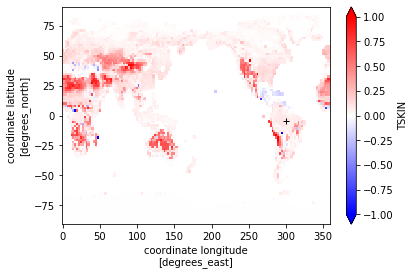

In [ ]:
delta_Ts_1pt=(ds_Ts[16*12:,ilat,ilon]-
              basecase_lnd_offline_Ts['TSKIN'][12*60:,ilat,ilon])

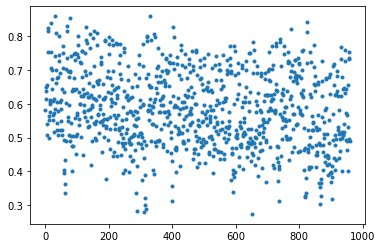

In [57]:
delta_Ts_1pt=(ds_Ts[16*12:,ilat,ilon]-
              basecase_lnd_offline_Ts['TSKIN'][12*60:,ilat,ilon])
plt.plot(delta_Ts_1pt,'.')

<xarray.DataArray 'lon' ()>
array(300., dtype=float32)
Coordinates:
    lon      float32 300.0
Attributes:
    long_name:  coordinate longitude
    units:      degrees_east